In [64]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

In [65]:
(X_train,y_train) , (X_test,y_test) = mnist.load_data()

In [66]:
X_train.shape

(60000, 28, 28)

In [67]:
y_train.shape

(60000,)

In [68]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

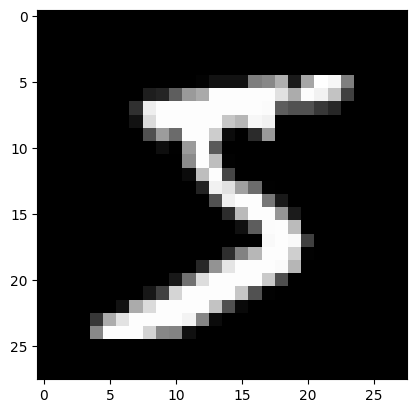

In [69]:
plt.imshow(X_train[0],cmap = 'grey')
plt.show()

In [70]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [71]:
y_train[0]

5

In [72]:
y_train = np.eye(10)[y_train] #np.eye creates identity matrix of 10x10
y_test = np.eye(10)[y_test]
print(y_test)

[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [73]:
X_train = X_train.reshape(-1,784)/255.0
X_test = X_test.reshape(-1,784)/255.0
print(X_train[0],X_train[0].shape)

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [74]:
X_train = X_train.T
X_test = X_test.T
y_train = y_train.T
y_test = y_test.T

In [75]:
def parameters():
    W1 = np.random.rand(10,784) - 0.5 #Outputs a matrix containing values between -0.5 and 0.5 
    b1 = np.random.rand(10,1) - 0.5
    W2 = np.random.rand(10,10) - 0.5
    b2 = np.random.rand(10,1) - 0.5
    return W1,b1,W2,b2

In [76]:
def ReLu(Z):
    return np.maximum(0,Z)

def softmax(Z):
    Z = np.exp(Z - np.max(Z, axis=0, keepdims=True)) #Axis = 0 Sum per column
    return Z / np.sum(Z, axis=0, keepdims=True)

def derv(Z):
    return Z > 0 #Returns 1 if True else 0

def forward_prop(W1,b1,W2,b2,X):
    Z1 = W1.dot(X) + b1
    A1 = ReLu(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1,A1,Z2,A2

def backward_prop(Z1,A1,Z2,A2,W2,X,Y):
    m = Y.shape[1]
    dZ2 = A2 - Y
    dW2 = 1/m * dZ2.dot(A1.T)
    db2 = 1/m * np.sum(dZ2,axis = 1,keepdims=True) #Axis = 1 Sum per row
    dZ1 = W2.T.dot(dZ2) * derv(Z1)
    dW1 = 1/m * dZ1.dot(X.T)
    db1 = 1/m * np.sum(dZ1,axis = 1,keepdims=True) 
    return dW1,db1,dW2,db2

def update(W1,b1,W2,b2,dW1,db1,dW2,db2,alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1,b1,W2,b2

In [77]:
def predictions(A2):
    return np.argmax(A2,axis = 0)

def accuracy(predictions,Y):
    label = np.argmax(Y,axis = 0) #Returns index of highest per column
    return np.mean(predictions == label)

In [78]:
def descent(X,Y,iterations,alpha):
    W1,b1,W2,b2 = parameters()
    for i in range(iterations):
        Z1,A1,Z2,A2 = forward_prop(W1,b1,W2,b2,X)
        dW1,db1,dW2,db2  = backward_prop(Z1,A1,Z2,A2,W2,X,Y)
        W1,b1,W2,b2  = update(W1,b1,W2,b2,dW1,db1,dW2,db2,alpha)
        if i % 10 == 0:
            print(f"Iteration: {i}, Accuracy: {accuracy(predictions(A2),Y)}")
    return W1,b1,W2,b2

In [79]:
alpha = 0.1
iterations = 1000

W1, b1, W2, b2 = descent(X_train,y_train,iterations,alpha)

Iteration: 0, Accuracy: 0.07226666666666667
Iteration: 10, Accuracy: 0.14805
Iteration: 20, Accuracy: 0.26445
Iteration: 30, Accuracy: 0.34591666666666665
Iteration: 40, Accuracy: 0.41658333333333336
Iteration: 50, Accuracy: 0.47175
Iteration: 60, Accuracy: 0.5170333333333333
Iteration: 70, Accuracy: 0.5557166666666666
Iteration: 80, Accuracy: 0.5900166666666666
Iteration: 90, Accuracy: 0.6173
Iteration: 100, Accuracy: 0.6389666666666667
Iteration: 110, Accuracy: 0.657
Iteration: 120, Accuracy: 0.6721333333333334
Iteration: 130, Accuracy: 0.6862833333333334
Iteration: 140, Accuracy: 0.6980666666666666
Iteration: 150, Accuracy: 0.7086166666666667
Iteration: 160, Accuracy: 0.71845
Iteration: 170, Accuracy: 0.7275
Iteration: 180, Accuracy: 0.7353666666666666
Iteration: 190, Accuracy: 0.7428833333333333
Iteration: 200, Accuracy: 0.7493833333333333
Iteration: 210, Accuracy: 0.7562333333333333
Iteration: 220, Accuracy: 0.7624333333333333
Iteration: 230, Accuracy: 0.7682166666666667
Iteration

In [80]:
Z1,A1,Z2,A2 = forward_prop(W1,b1,W2,b2,X_test)
pred = predictions(A2)
acc = accuracy(pred,y_test)
print(f"Test Accuracy: {acc:.4f}")

Test Accuracy: 0.8838


In [81]:
X_test[0].shape

(10000,)

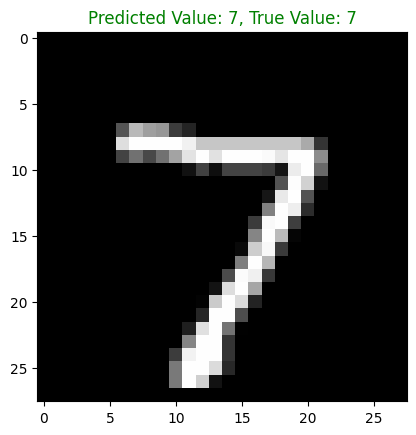

In [82]:
index = 0
plt.imshow(X_test[:,index].reshape(28,28),cmap = 'grey')
plt.title(f"Predicted Value: {predictions(A2)[index]}, True Value: {np.argmax(y_test[:,index])}",color = 'green')
plt.show()

In [ ]:
fig, axes = plt.subplots(3,3,figsize = (10,8))
misclassified = [i for i in range(X_test.shape[1]) if predictions(A2)[i] != np.argmax(y_test[:,i])]
print(f"No of misclassifications: {len(misclassified)} out of {X_test.shape[1]}")
for i,ax in enumerate(axes.flat):
    if i < len(misclassified):
        ax.imshow(X_test[:,misclassified[i]].reshape(28,28),cmap = 'grey')
        ax.set_title(f"Predicted Value: {predictions(A2)[misclassified[i]]}, True Value: {np.argmax(y_test[:,misclassified[i]])}",color = 'red')
        ax.axis('off')
plt.tight_layout()
plt.show()